In [331]:
import pandas as pd
import numpy as np
import csv
import ast
import matplotlib.pyplot as plt
data = pd.read_csv('/content/combined_allfile.csv')
df = pd.DataFrame(data)
null_counts = df.isnull().sum()
print(null_counts)
df.shape

title               1
countries          31
affiliations     3111
Publisher          11
Ref_count         392
Cited_count         4
keywords            0
subject_areas       0
FWCI                0
dtype: int64


(20181, 9)

In [332]:
df['affiliations'].value_counts().head()
df['subject_areas'].value_counts().head()
df['keywords'].value_counts().head()
df['Publisher'].value_counts().head()
df['countries'].value_counts().head()

,count
countries,
['Thailand'],10560
"['United States', 'Thailand']",938
"['Thailand', 'Japan']",533
"['Japan', 'Thailand']",513
"['Thailand', 'United States']",380


In [333]:
df = df.dropna(subset=['Publisher'])
df = df.drop(columns=['countries' ,'affiliations', 'title','keywords'])

df.mean(numeric_only =True)
df.select_dtypes(include=['number']).mean()
df.fillna(df.mean(numeric_only =True), inplace=True)
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)


null_counts = df.isnull().sum()
print(null_counts)

Publisher        0
Ref_count        0
Cited_count      0
subject_areas    0
FWCI             0
dtype: int64


<ipython-input-334-5de9daed8d31>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_area_counts.index, y=subject_area_counts.values, palette='viridis')


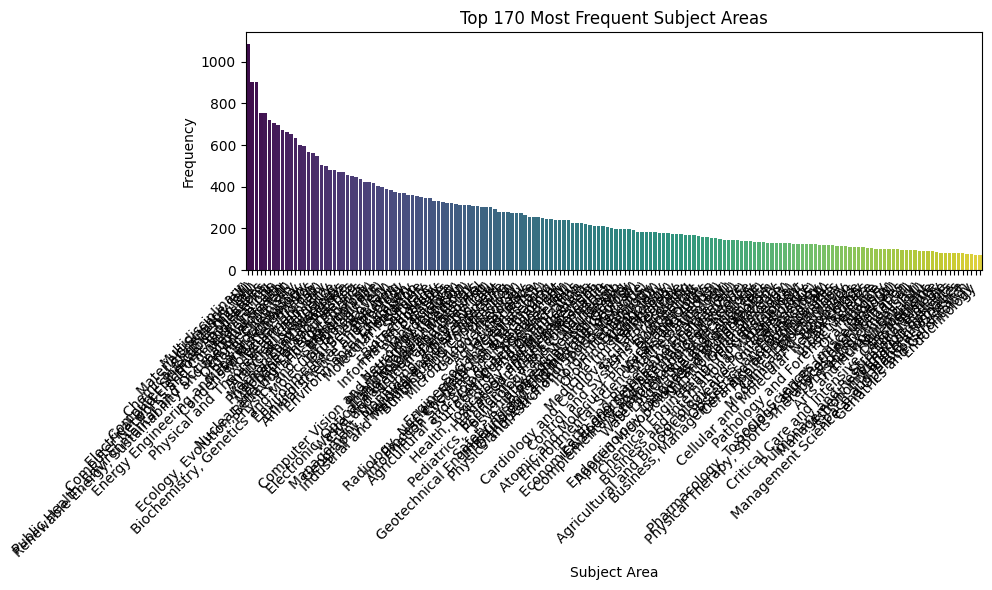

20170

In [334]:
import seaborn as sns
df['subject_areas'] = df['subject_areas'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
subject_area_counts = tmp.explode().value_counts().head(170)


plt.figure(figsize=(10, 6))
sns.barplot(x=subject_area_counts.index, y=subject_area_counts.values, palette='viridis')


plt.title('Top 170 Most Frequent Subject Areas')
plt.xlabel('Subject Area')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

df['subject_areas'].value_counts().sum()
# df.head()

In [335]:
subject_area_counts = tmp.explode().value_counts().head(170)
valid_subjects = subject_area_counts.index

df['subject_areas'] = df['subject_areas'].apply(
    lambda x: [keyword for keyword in x if keyword in valid_subjects] if isinstance(x, list) else []
)


df = df[df['subject_areas'].apply(lambda x: len(x) > 0)]
df['subject_areas'].value_counts()


# expanded = df['Publisher'].explode()
# # df['Publisher'].value_counts()

# top_120_keywords = expanded.value_counts().head(120).index
# df['Publisher'] = df['Publisher'].apply(
#     lambda x: x if x in top_120_keywords else np.nan
# )

# # แสดงผลลัพธ์
# print(df['Publisher'].head(30))


,count
subject_areas,
[Multidisciplinary],1048
[Medicine (all)],637
[Nuclear and High Energy Physics],414
[Veterinary (all)],308
[Engineering (all)],235
...,...
"[Mechanical Engineering, Management, Monitoring, Policy and Law, Building and Construction, Energy (all)]",1
"[Infectious Diseases, Microbiology (medical), Public Health, Environmental and Occupational Health, Dermatology]",1
[Management Science and Operations Research],1


<ipython-input-336-3f2aba55af57>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.index, y=publisher_counts.values, palette='viridis')


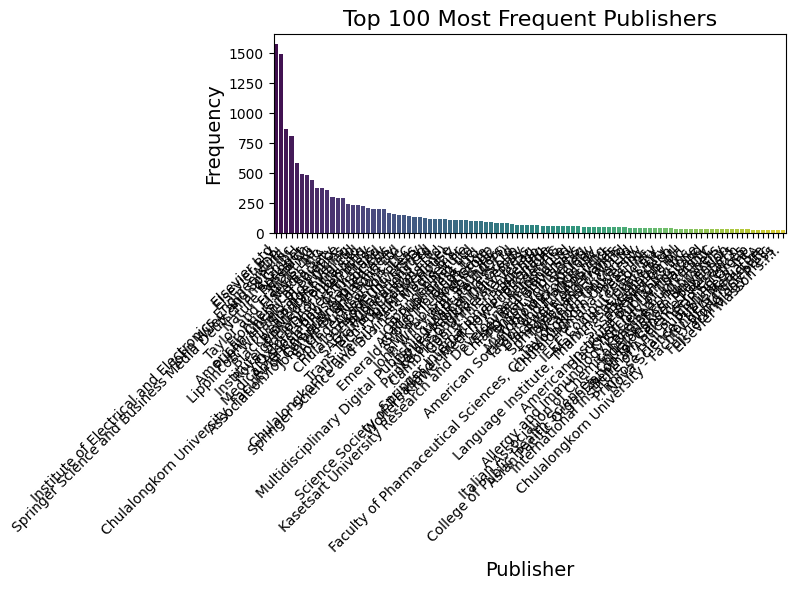

19518

In [336]:
import seaborn as sns
# df['Publisher'] = df['Publisher'].apply(
#     lambda x: x if x in top_120_keywords else np.nan
# )
publisher_counts = df['Publisher'].value_counts().head(100)
plt.figure(figsize=(8, 6))


sns.barplot(x=publisher_counts.index, y=publisher_counts.values, palette='viridis')


plt.title('Top 100 Most Frequent Publishers', fontsize=16)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

df['Publisher'].value_counts().sum()





# top_120_keywords = expanded.value_counts().head(120).index
# df['Publisher'] = df['Publisher'].apply(
#     lambda x: x if x in top_120_keywords else np.nan
# )

# # แสดงผลลัพธ์
# print(df['Publisher'].head(30))

In [337]:
expanded = df['Publisher'].explode()
top_100_publishers = expanded.value_counts().head(300).index
# df['Publisher'].isna().sum()
df['Publisher'] = df['Publisher'].apply(
    lambda x: x if x in top_100_publishers else np.nan
)
df['Publisher'].isna().sum()
df.dropna(subset=['Publisher'], inplace=True)
df.shape

(18272, 5)

In [338]:
df['FWCI'] = df['FWCI'].apply(lambda x: 0 if x <= 1 else 1)
df['FWCI']
df['FWCI'].value_counts()

,count
FWCI,
0,12455
1,5817


In [339]:

df_dummies_publisher = pd.get_dummies(df['Publisher'], prefix='Publisher')

In [340]:
from sklearn.preprocessing import MultiLabelBinarizer
# สร้าง MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# ใช้ MultiLabelBinarizer เพื่อแปลงข้อมูล
encoded = mlb.fit_transform(df['subject_areas'])

# แปลงผลลัพธ์ให้เป็น DataFrame
encoded_df_subject_areas = pd.DataFrame(encoded, columns=mlb.classes_)


# print(encoded_df_subject_areas.head())

In [341]:

combined_df = pd.concat([encoded_df_subject_areas,
                        df_dummies_publisher, df[['Ref_count','Cited_count', 'FWCI']]], axis=1)
combined_df.to_csv('train_data.csv', index=False)